<a href="https://colab.research.google.com/github/Natakorn-168006/Data-science-bootcamp-8/blob/main/Python/World_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.tsv')

In [59]:
df

,country,year,continent,lifeExp,pop,gdpPercap
0,Afghanistan,1952,Asia,28.801,8425333,779.445314
1,Afghanistan,1957,Asia,30.332,9240934,820.853030
2,Afghanistan,1962,Asia,31.997,10267083,853.100710
3,Afghanistan,1967,Asia,34.020,11537966,836.197138
4,Afghanistan,1972,Asia,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,Africa,62.351,9216418,706.157306
1700,Zimbabwe,1992,Africa,60.377,10704340,693.420786
1701,Zimbabwe,1997,Africa,46.809,11404948,792.449960
1702,Zimbabwe,2002,Africa,39.989,11926563,672.038623


In [69]:
def world_develop(year=2007):

    df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.tsv')
    year = year
    df_year= df[df.year==  year ]

    dict = {
        'Asia':'red',
        'Europe':'green',
        'Africa':'blue',
        'Americas':'yellow',
        'Oceania':'black'
    }
    df_year['color'] = df_year['continent'].apply(lambda i: dict[i])
    np_col = np.array(df_year['color'])
    plt.scatter(df_year.gdpPercap,df_year.lifeExp,s=np_pop,c=np_col,alpha=0.5)
    plt.xscale('log')
    plt.xlabel('GDP per Capita [in USD]')
    plt.ylabel('Life Expectancy [in years]')
    plt.title(f'World Development in {year} ')
    plt.xticks([10**3,10**4,10**5], ['1k','10k','100k'])
    plt.show()

    df.set_index(['country','year'],inplace=True)
    life = df_year[['continent','lifeExp']].groupby(by='continent').mean('lifeExp').sort_values('lifeExp')
    life.plot.bar()


<ipython-input-69-017d51a64724>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['color'] = df_year['continent'].apply(lambda i: dict[i])


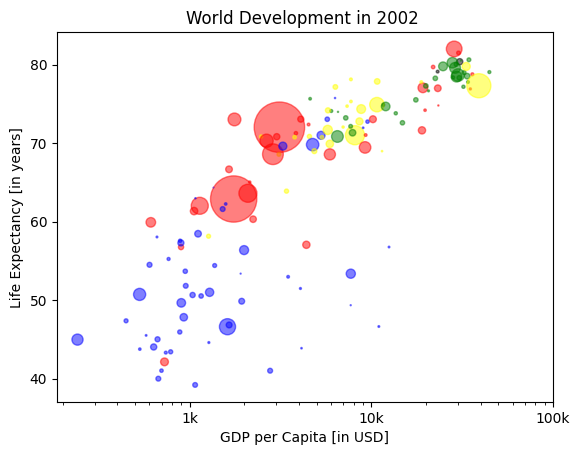

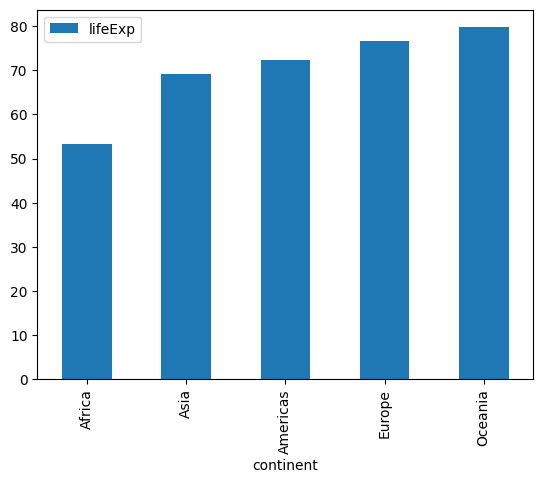

In [70]:
world_develop(year=2002)